* Implement a basic ANN from scratch using TensorFlow. Train the network on the MNIST dataset (or CIFAR-10 for a more advanced approach) and evaluate the model's performance.
* Construct a Convolutional Neural Network to classify images from the CIFAR-10 dataset. Include convolutional layers, pooling, and fully connected layers.
* Compare results between the ANN and CNN models and provide visualizations (e.g., accuracy and loss curves).

# ANN Implementation:

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


# 2. Load and Preprocess the MNIST Dataset:


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 3.DEFINE ANN ARCHITECTURE


In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model

<Sequential name=sequential, built=True>

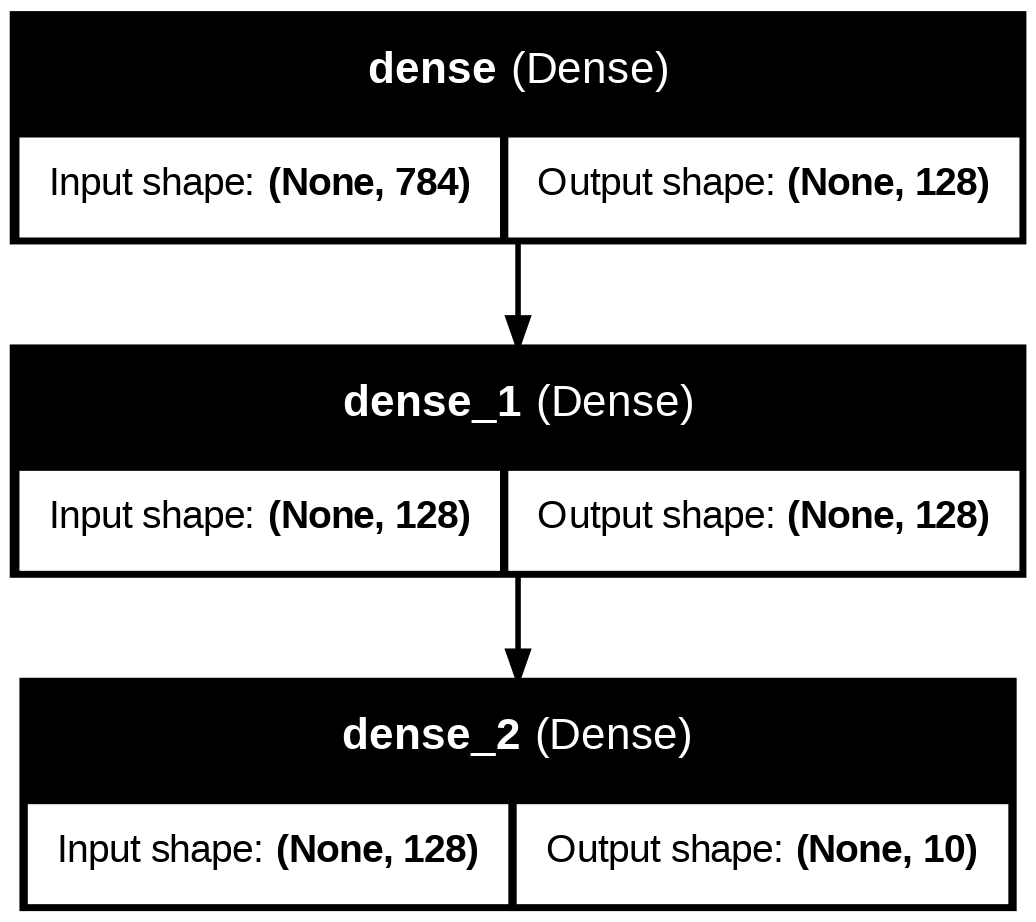

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True,)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# COMPILE THE MODEL

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# 1
import os
import datetime

In [ ]:
#2
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logs/20240924-140048


# TRAIN THE MODEL

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8805 - loss: 0.4031 - val_accuracy: 0.9646 - val_loss: 0.1146
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9716 - loss: 0.0982 - val_accuracy: 0.9744 - val_loss: 0.0843
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9797 - loss: 0.0637 - val_accuracy: 0.9747 - val_loss: 0.0767
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9846 - loss: 0.0475 - val_accuracy: 0.9754 - val_loss: 0.0798
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0389 - val_accuracy: 0.9755 - val_loss: 0.0788
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9896 - loss: 0.0303 - val_accuracy: 0.9768 - val_loss: 0.0720
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9917 - loss: 0.0244 - val_accuracy: 0.9757 - val_loss: 0.0841
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9929 - loss: 0.021

# evalute the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.1063
Test accuracy: 0.9771000146865845


#CNN implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# 2. Load and Preprocess

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


#3. Define the CNN Model:

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# complie the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 172ms/step - accuracy: 0.3527 - loss: 1.7846 - val_accuracy: 0.5281 - val_loss: 1.3283
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 93s 199ms/step - accuracy: 0.5570 - loss: 1.2508 - val_accuracy: 0.6094 - val_loss: 1.1131
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 168ms/step - accuracy: 0.6210 - loss: 1.0902 - val_accuracy: 0.6298 - val_loss: 1.0714
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.6543 - loss: 0.9900 - val_accuracy: 0.6600 - val_loss: 0.9777
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 180ms/step - accuracy: 0.6864 - loss: 0.9061 - val_accuracy: 0.6703 - val_loss: 0.9568
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 171ms/step - accuracy: 0.7072 - loss: 0.8464 - val_accuracy: 0.6826 - val_loss: 0.9241
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 167ms/step - accuracy: 0.7251 - loss: 0.7973 - val_accuracy: 0.6731 - val_loss: 0.9392
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.7345 - loss: 0

# evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7052 - loss: 0.8653
Test accuracy: 0.7024000287055969


#  Visualization:

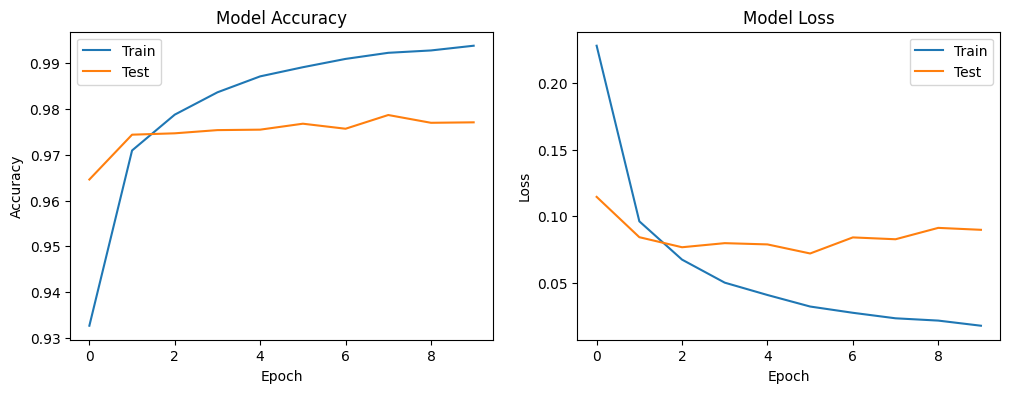

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])


plt.show()